<a href="https://colab.research.google.com/github/parth-gz/Data-Science-Assignments/blob/main/Assignment-8%20Simple%20Linear%20Regression/1_calories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 8 - Linear Regression

## Problem statement 1
A certain food-based company conducted a survey with the help of a fitness company to find the relationship between a person’s weight gain and the number of calories they consumed in order to come up with diet plans for these individuals. Build a Simple Linear Regression model with calories consumed as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models.

## 1. Business Problem

1.1 What is the business objective?

The objective is to analyze the relationship between calories consumed and weight gained to develop a predictive model. This will help individuals and businesses in the health, fitness, and nutrition industries understand how calorie intake impacts weight gain.


1.2 Are there any constraints?

Limited Data: The dataset contains only 14 observations, which may limit generalizability.

Linear Assumption: The model assumes a direct relationship between calories and weight, but real-world factors like metabolism and activity level can affect outcomes.

No Additional Features: Other influencing factors (e.g., age, gender, activity level) are not considered in this dataset.

Overfitting Risk: Using polynomial transformations can improve accuracy but may reduce generalization to new data.

## 2. Data dictionary
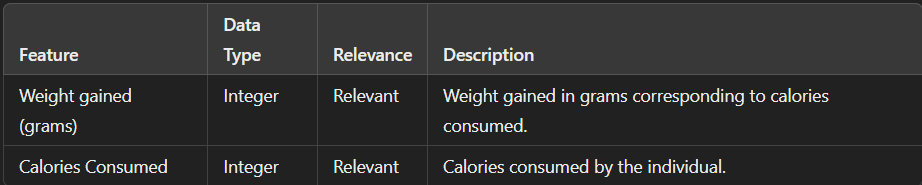

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("calories_consumed.csv")

In [6]:
df.head()

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


## 3. Data Preprocessing

In [3]:
#identifing null values
df.isnull().sum()

,0
Weight gained (grams),0
Calories Consumed,0


no null values

In [4]:
#identifying duplicates
df.duplicated().sum()

0

no duplicates

In [5]:
#check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Weight gained (grams)  14 non-null     int64
 1   Calories Consumed      14 non-null     int64
dtypes: int64(2)
memory usage: 356.0 bytes


<Axes: ylabel='Weight gained (grams)'>

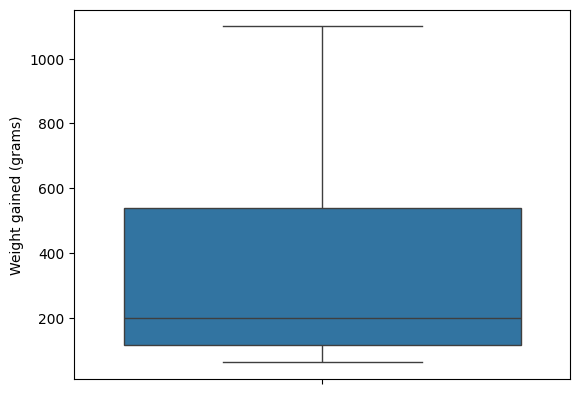

In [9]:
sns.boxplot(df['Weight gained (grams)'])

<Axes: ylabel='Calories Consumed'>

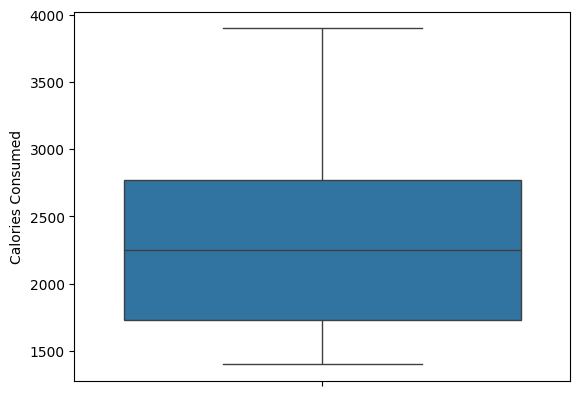

In [10]:
sns.boxplot(df['Calories Consumed'])

no outliers

## 4. EDA

In [11]:
df.describe()

,Weight gained (grams),Calories Consumed
count,14.000000,14.000000
mean,357.714286,2340.714286
std,333.692495,752.109488
min,62.000000,1400.000000
25%,114.500000,1727.500000
50%,200.000000,2250.000000
75%,537.500000,2775.000000
max,1100.000000,3900.000000


<Axes: xlabel='Weight gained (grams)', ylabel='Count'>

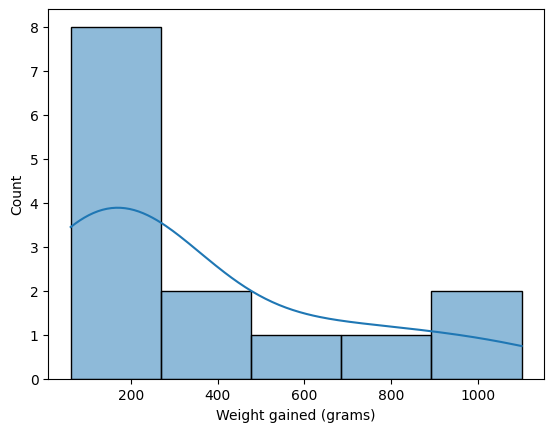

In [13]:
#univariate analysis
sns.histplot(df['Weight gained (grams)'],kde=True)

<Axes: xlabel='Calories Consumed', ylabel='Count'>

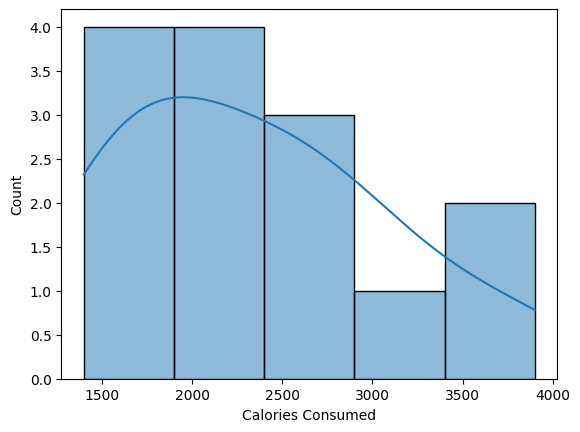

In [14]:
sns.histplot(df['Calories Consumed'],kde=True)

<Axes: xlabel='Calories Consumed', ylabel='Weight gained (grams)'>

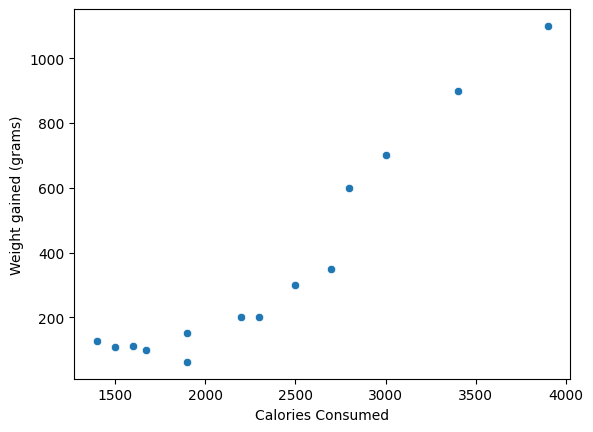

In [19]:
#Bivariate analysis
sns.scatterplot(x=df['Calories Consumed'],y=df['Weight gained (grams)'])

<Axes: xlabel='Calories Consumed', ylabel='Weight gained (grams)'>

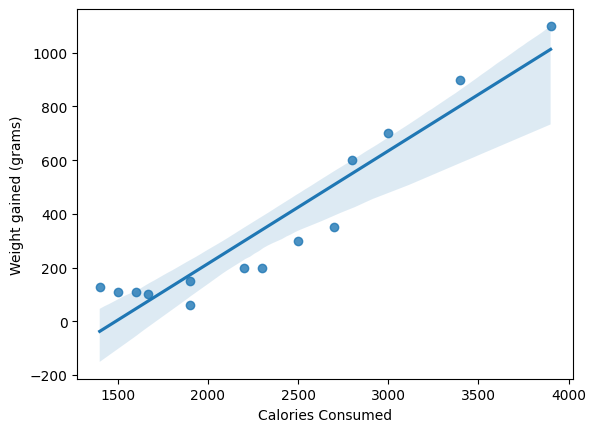

In [20]:
#scatterplot with regression line
sns.regplot(x=df['Calories Consumed'],y=df['Weight gained (grams)'])

In [21]:
#correlation matrix
df.corr()

,Weight gained (grams),Calories Consumed
Weight gained (grams),1.000000,0.946991
Calories Consumed,0.946991,1.000000


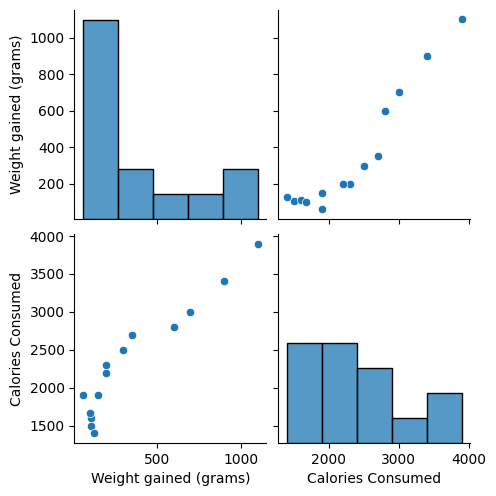

In [22]:
sns.pairplot(df)

<Axes: >

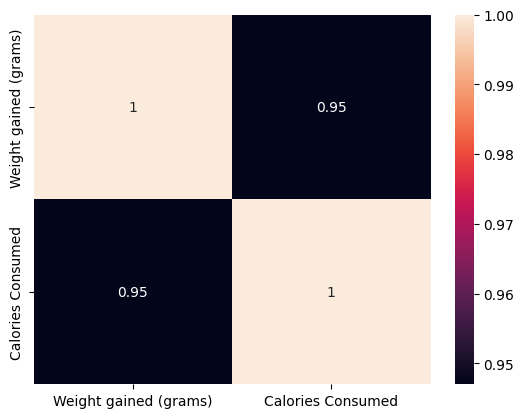

In [23]:
sns.heatmap(df.corr(),annot=True)

## 5. Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [28]:
X = df[['Weight gained (grams)']]
y = df['Calories Consumed']

In [29]:
#dividing the data in train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
model=LinearRegression()

In [31]:
model.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred=model.predict(X_test)

In [33]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Simple Linear Regression - RMSE: {rmse}, R-Squared: {r2}')

Simple Linear Regression - RMSE: 204.36123425476396, R-Squared: 0.9621097150609703


In [34]:
#Apply different transformations and calculate RMSE and correlation coefficient for each model
#Log Transformation
X_log = np.log(X)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y, test_size=0.2, random_state=42)
model_log = LinearRegression()
model_log.fit(X_train_log, y_train_log)
y_pred_log = model_log.predict(X_test_log)

rmse_log = np.sqrt(mean_squared_error(y_test_log, y_pred_log))
r2_log = r2_score(y_test_log, y_pred_log)
print(f'Log Transformation - RMSE: {rmse_log}, R-Squared: {r2_log}')

Log Transformation - RMSE: 368.38278340416366, R-Squared: 0.8768797504055049


In [35]:
#Polynomial Transformation
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)
y_pred_poly = model_poly.predict(X_test_poly)

rmse_poly = np.sqrt(mean_squared_error(y_test_poly, y_pred_poly))
r2_poly = r2_score(y_test_poly, y_pred_poly)
print(f'Polynomial Transformation - RMSE: {rmse_poly}, R-Squared: {r2_poly}')


Polynomial Transformation - RMSE: 399.28897235344664, R-Squared: 0.8553543194568908


In [36]:
# Choose the best fit model
best_model = min([(rmse, r2, 'Simple Linear Regression'), (rmse_log, r2_log, 'Log Transformation'), (rmse_poly, r2_poly, 'Polynomial Transformation')])

print(f'Best Model: {best_model[2]} with RMSE: {best_model[0]} and R-Squared: {best_model[1]}')

Best Model: Simple Linear Regression with RMSE: 204.36123425476396 and R-Squared: 0.9621097150609703
